# EDA

In [20]:
#import necessary libraries
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
#round all floats to 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#loading data into DataFrame
df_housing = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [9]:
#examining the data
df_housing.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


In [6]:
df_housing.info()
#21597 entries, 21 columns
# there are NaN entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# how is the data indexed?
# standard numerical indexes starting at 0 with step=1, last index = 21596
df_housing.index

RangeIndex(start=0, stop=21597, step=1)

In [5]:
df_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


In [8]:
df_housing.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8 non-null      float64
 1   price          8 non-null      float64
 2   bedrooms       8 non-null      float64
 3   bathrooms      8 non-null      float64
 4   sqft_living    8 non-null      float64
 5   sqft_lot       8 non-null      float64
 6   floors         8 non-null      float64
 7   waterfront     8 non-null      float64
 8   view           8 non-null      float64
 9   condition      8 non-null      float64
 10  grade          8 non-null      float64
 11  sqft_above     8 non-null      float64
 12  yr_built       8 non-null      float64
 13  yr_renovated   8 non-null      float64
 14  zipcode        8 non-null      float64
 15  lat            8 non-null      float64
 16  long           8 non-null      float64
 17  sqft_living15  8 non-null      float64
 18  sqft_lot15   

Observations:
1. What is the grading system?
1. what does 'view' mean?
1. How is the condition rated?
2. Missing values in the waterfront, view, yr_renovated columns
1. sqft_basement has non-numerical entries (e.g. ?)
5. The date column is in string format and needs to be changed to datetime
8. df.describe is not of much help as it doesn't show columns with missing data (NaN)
1. column names are already in Snake Case, no renaming necessary
1. What are half floors?
1. What are .25 bathrooms?

In [10]:
# Check for duplicates - no duplicates!
df_housing.duplicated().value_counts()

False    21597
dtype: int64

In [11]:
# check data types in data frame
df_housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
# change "date" dtype to datetime with format %Y/%m/%d
df_housing['date'] = pd.to_datetime(df_housing['date'], format='%m/%d/%Y')

In [29]:
# How to display only the year???
# change "yr_built" dtype to datetime with format %Y
df_housing['yr_built'] = pd.to_datetime(df_housing['yr_built'], format='%Y')

In [30]:
# how to convert yr_renovated? wrong format 0, NaN
# change "yr_renovated" dtype to datetime with format %Y
df_housing['yr_renovated'] = pd.to_datetime(df_housing['yr_renovated'], format='%Y')

ValueError: time data '0' does not match format '%Y' (match)

In [27]:
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.000,1955-01-01,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.000,1951-01-01,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.000,1933-01-01,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.000,1965-01-01,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.000,1987-01-01,0.000,98074,47.617,-122.045,1800,7503


In [13]:
# Take a new look
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [14]:
# sqft_basement contains string objects, we want floats.
# try to convert it to get error message:
df_housing = df_housing.astype({'sqft_basement': float})
# we get '?' as non convertable entry

ValueError: could not convert string to float: '?'

In [15]:
#look at rows with '?' entry in sqft_basement column
df_housing.query('sqft_basement == "?"')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
18,16000397,2014-12-05,189000.000,2,1.000,1200,9850,1.000,0.000,0.000,...,7,1200,?,1921,0.000,98002,47.309,-122.210,1060,5095
42,7203220400,2014-07-07,861990.000,5,2.750,3595,5639,2.000,0.000,0.000,...,9,3595,?,2014,0.000,98053,47.685,-122.016,3625,5639
79,1531000030,2015-03-23,720000.000,4,2.500,3450,39683,2.000,0.000,0.000,...,10,3450,?,2002,0.000,98010,47.342,-122.025,3350,39750
112,2525310310,2014-09-16,272500.000,3,1.750,1540,12600,1.000,0.000,0.000,...,7,1160,?,1980,0.000,98038,47.362,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,2014-07-11,504600.000,5,3.000,2360,5000,1.000,0.000,0.000,...,7,1390,?,2008,0.000,98103,47.693,-122.330,2180,5009
21447,1760650900,2014-07-21,337500.000,4,2.500,2330,4907,2.000,0.000,0.000,...,7,2330,?,2013,NaN,98042,47.359,-122.081,2300,3836
21473,6021503707,2015-01-20,352500.000,2,2.500,980,1010,3.000,NaN,0.000,...,8,980,?,2008,0.000,98117,47.684,-122.387,980,1023
21519,2909310100,2014-10-15,332000.000,4,2.500,2380,5737,2.000,0.000,0.000,...,7,2380,?,2010,0.000,98023,47.282,-122.356,2380,5396


In [16]:
#replace the `?`-character with a numpy NaN value
df_housing['sqft_basement'] = df_housing.sqft_basement.replace('?',np.NaN)
# change data type to float
df_housing = df_housing.astype({'sqft_basement': float})
df_housing.sqft_basement.dtypes

dtype('float64')

In [17]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [18]:
# looking at missing values
# display number of missing values per column
df_housing.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [24]:
print(f"numbers of rows : {df_housing.shape[0]}")
print(f"missing values in waterfront : {round(df_housing.waterfront.isna().sum()/df_housing.shape[0]*100,2)} %")
print(f"missing values in view : {round(df_housing.view.isna().sum()/df_housing.shape[0]*100,2)} %")
print(f"missing values in sqft_basement : {round(df_housing.sqft_basement.isna().sum()/df_housing.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df_housing.yr_renovated.isna().sum()/df_housing.shape[0]*100,2)} %")

print(f"missing values in data frame : {round(df_housing.isna().sum().sum()/(df_housing.shape[0]*df_housing.shape[1])*100,2)} %")
# .sum() twice in last row: first gives a series of the number of nan-values per column, 
# the second sums these up

numbers of rows : 21597
missing values in waterfront : 11.0 %
missing values in view : 0.29 %
missing values in sqft_basement : 2.1 %
missing values in yr_renovated : 17.79 %
missing values in data frame : 1.48 %


<AxesSubplot:>

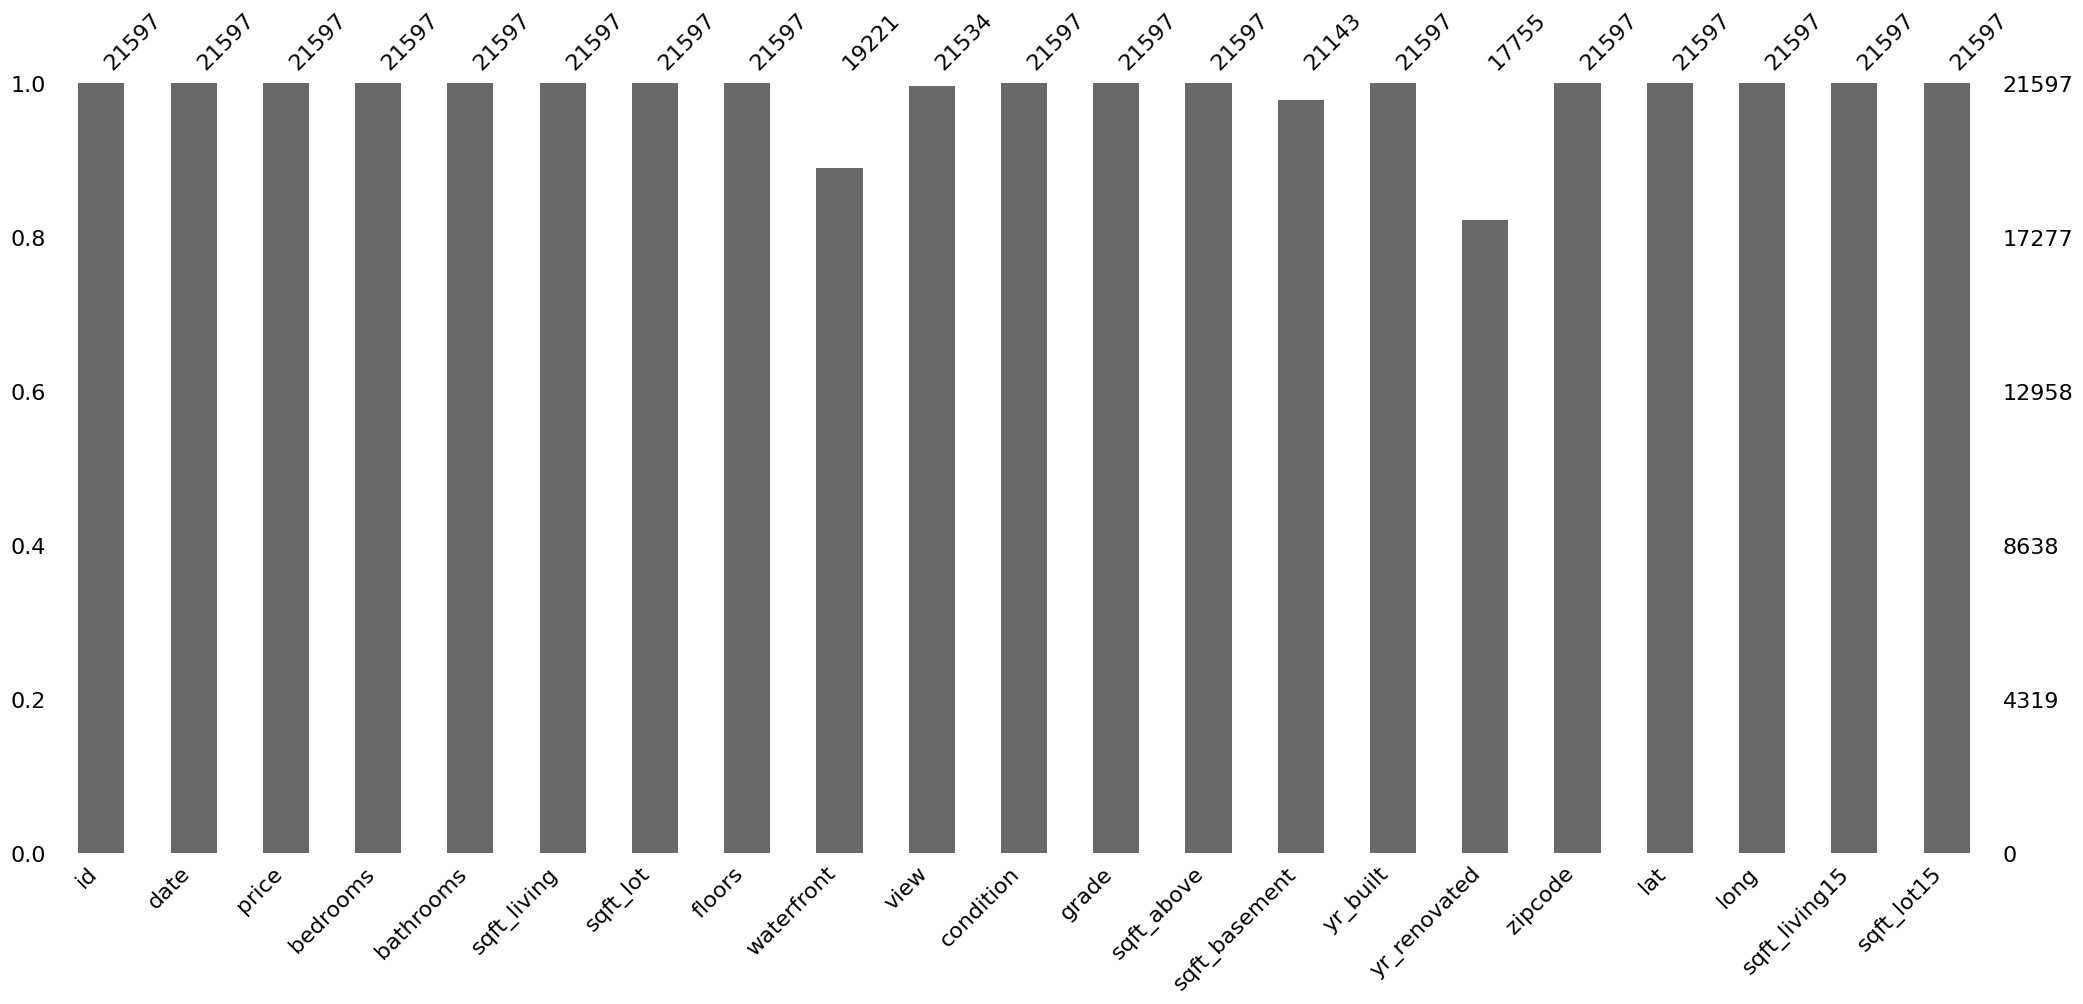

In [21]:
# plotting percentage of missing values per column
msno.bar(df_housing)

<AxesSubplot:>

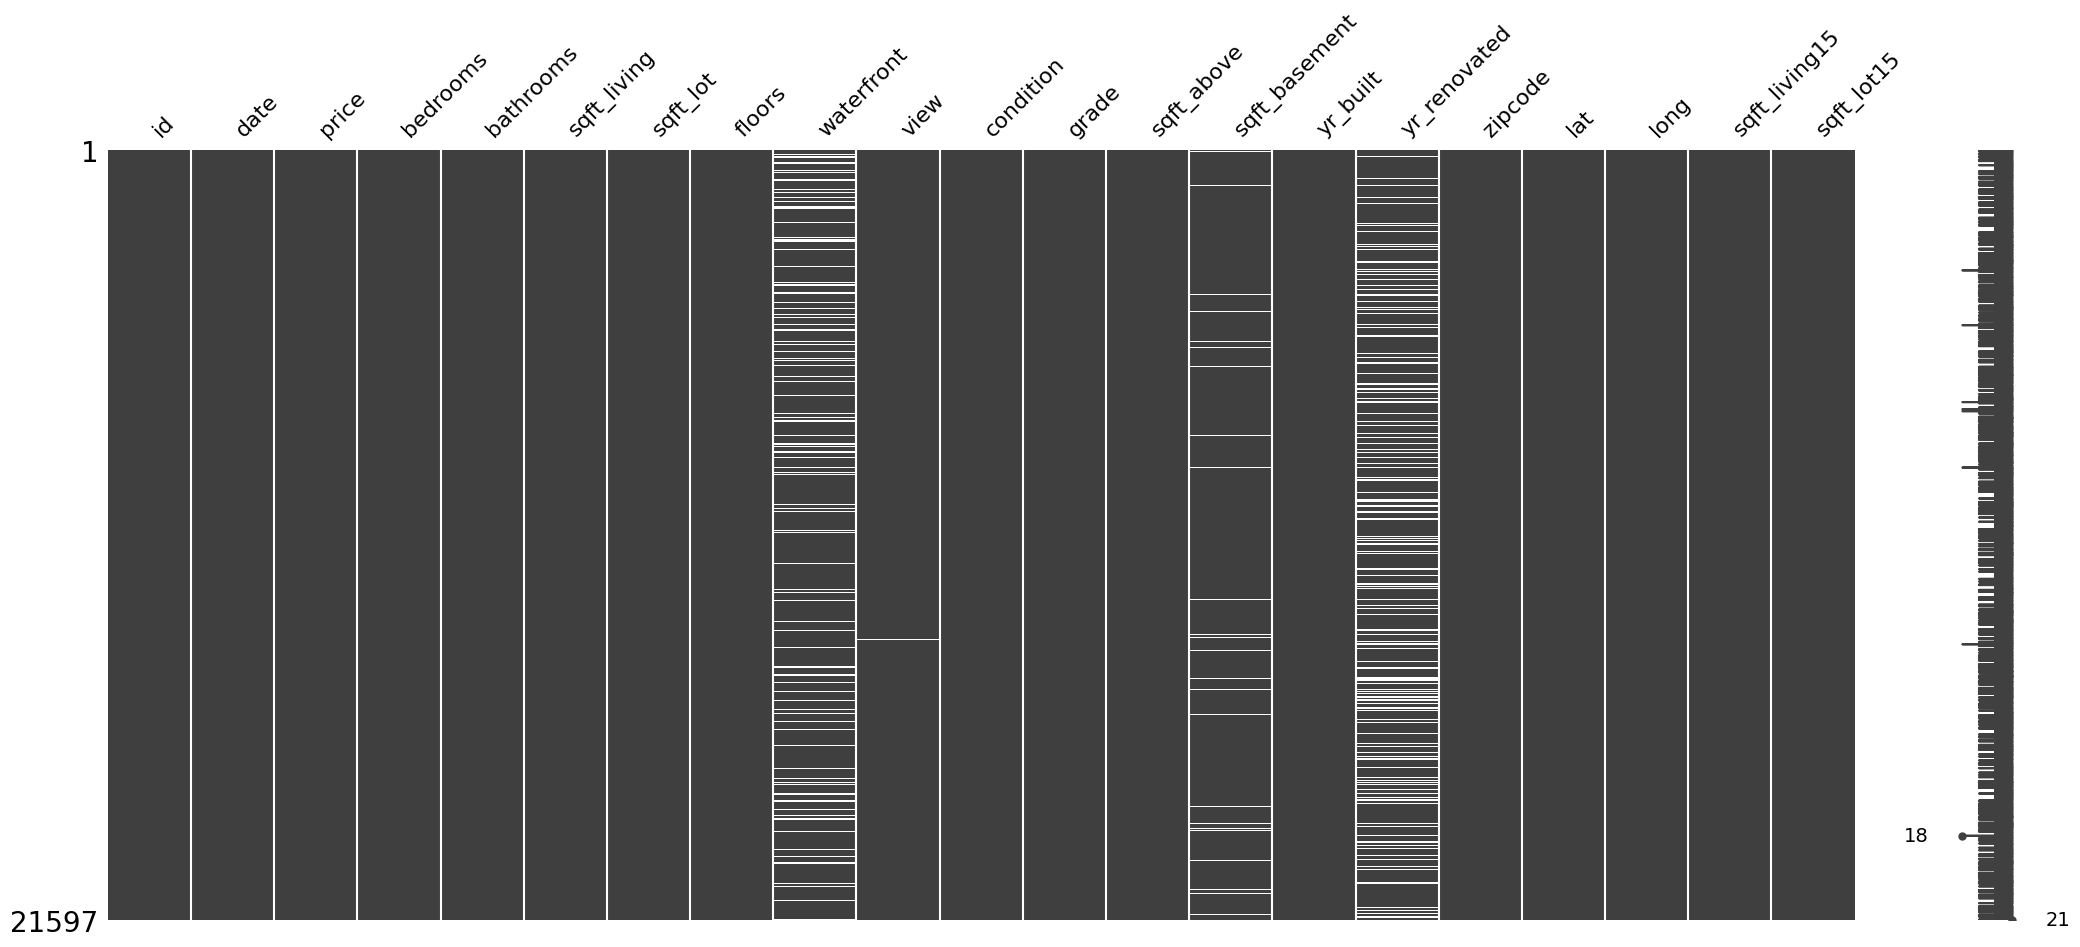

In [22]:
msno.matrix(df_housing)

In [25]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

## categorical data:

- id
- date
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- grade
- yr_built
- yr_renovated
- zipcode

## continuous data:

- price
- sqft_above
- sqft_basement
- lat
- long
- sqft_living15
- sqft_lot15

## Research Questions and Hypothesis Generation

### Questions with belonging hypotheses and their indicators:

* Does the location of a house affect the price?
    1. The closer a house is to the city center, the higher the price (geolocation)
    1. If a house is located close to water, then the price is higher (waterfront(yes/no)) 
    1. If the house is located in a "good" zip code, the price is higher (zipcode)

* Does the size of a house affect the price?
    1. The more bedrooms a house has, the higher the price (bedrooms)
    1. The higher the square footage of the house, the higher the price (sqft_liviing)
    1. The more bathrooms the house has, the higher the price
    1. The more floors the house has, the higher the price (floors)
    1. If the house has a basement, the price is higher (sqft_basement)
    
* Does the interest in a house affect the price?
    1. The higher the number of views, the higher the price (view)

* Does the state the house is in affect the price?
    1. The better the overall condition of the house, the higher the price (condition)
    1. The better the grade, the higher the price (grade)
    1. The newer the renovation status, the higher the price (yr_renovated)

### Questions relevant for Client

Client: Larry Sanders, Buyer.
Characteristics: Waterfront , limited budget, nice & isolated but central neighborhood without kids (but got some of his own, just doesn't want his kids to play with other kids .. because of germs)

* Are there houses that meet all the criteria?
    1. Are there limited budget houses at the waterfront?
    1. Are there isolated but central houses?